<a href="https://colab.research.google.com/github/manasc12/RoadMishapRiskAssessment/blob/master/UK_Traffic_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Load Prerequisite Libraries

In [ ]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp

<h1>Load The Data

In [ ]:
df = pd.read_csv('Data/RealUKAccidentAnalysisData/Accident_Information.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h1>Examine The Data</h1>

In [ ]:
df.head

In [ ]:
df.shape

(2047256, 34)

In [ ]:
df.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

<h3>1. List down the Categorical Attributes

In [ ]:
df.nunique(axis=0)

Accident_Index                                 2047256
1st_Road_Class                                       6
1st_Road_Number                                   7160
2nd_Road_Class                                       6
2nd_Road_Number                                   7512
Accident_Severity                                    3
Carriageway_Hazards                                  7
Date                                              4748
Day_of_Week                                          7
Did_Police_Officer_Attend_Scene_of_Accident          3
Junction_Control                                     6
Junction_Detail                                     10
Latitude                                       1319367
Light_Conditions                                     6
Local_Authority_(District)                         416
Local_Authority_(Highway)                          207
Location_Easting_OSGR                           279456
Location_Northing_OSGR                          344815
Longitude 

In [ ]:
df.Accident_Severity.unique()

array(['Serious', 'Slight', 'Fatal'], dtype=object)

In [ ]:
df.Police_Force.unique()

array(['Metropolitan Police', 'City of London', 'Cumbria', 'Lancashire',
       'Merseyside', 'Greater Manchester', 'Cheshire', 'Northumbria',
       'Durham', 'North Yorkshire', 'West Yorkshire', 'South Yorkshire',
       'Humberside', 'Cleveland', 'West Midlands', 'Staffordshire',
       'West Mercia', 'Warwickshire', 'Derbyshire', 'Nottinghamshire',
       'Lincolnshire', 'Leicestershire', 'Northamptonshire',
       'Cambridgeshire', 'Norfolk', 'Suffolk', 'Bedfordshire',
       'Hertfordshire', 'Essex', 'Thames Valley', 'Hampshire', 'Surrey',
       'Kent', 'Sussex', 'Devon and Cornwall', 'Avon and Somerset',
       'Gloucestershire', 'Wiltshire', 'Dorset', 'North Wales', 'Gwent',
       'South Wales', 'Dyfed-Powys', 'Northern', 'Grampian', 'Tayside',
       'Fife', 'Lothian and Borders', 'Central', 'Strathclyde',
       'Dumfries and Galloway'], dtype=object)

In [ ]:
df.Number_of_Vehicles.unique()

array([ 1,  2,  4,  3,  5,  6,  8,  7, 13, 10, 11, 18,  9, 20, 17, 15, 12,
       14, 22, 16, 28, 32, 19, 29, 34, 67, 21, 37, 23])

In [ ]:
df.Number_of_Casualties.unique()

array([ 1,  2,  5,  4,  3,  8,  7,  6, 10,  9, 23, 17, 13, 11, 19, 15, 16,
       12, 14, 18, 20, 29, 21, 35, 22, 26, 45, 41, 36, 40, 25, 28, 42, 68,
       27, 32, 62, 47, 48, 24, 43, 87, 63, 51, 33, 38, 46, 70, 93, 54, 34,
       58])

In [ ]:
df.Day_of_Week.unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
df.Time.unique()

array(['17:42', '17:36', '00:15', ..., '05:57', '04:26', '01:57'],
      dtype=object)

In [ ]:
df['Local_Authority_(District)'].unique()

array(['Kensington and Chelsea', 'Westminster', 'Hammersmith and Fulham',
       'City of London', 'Tower Hamlets', 'Southwark', 'Hackney',
       'Islington', 'Camden', 'Lambeth', 'Brent', 'Haringey', 'Barnet',
       'Ealing', 'Richmond upon Thames', 'Waltham Forest', 'Newham',
       'London Airport (Heathrow)', 'Hillingdon', 'Harrow', 'Hounslow',
       'Enfield', 'Redbridge', 'Barking and Dagenham', 'Havering',
       'Croydon', 'Wandsworth', 'Sutton', 'Lewisham', 'Bromley',
       'Greenwich', 'Bexley', 'Kingston upon Thames', 'Merton',
       'South Lakeland', 'Barrow-in-Furness', 'Carlisle', 'Eden',
       'Allerdale', 'Copeland', 'Blackpool', 'Fylde', 'Lancaster',
       'Blackburn with Darwen', 'Preston', 'Wyre', 'South Ribble',
       'West Lancashire', 'Chorley', 'Hyndburn', 'Ribble Valley',
       'Pendle', 'Rossendale', 'Burnley', 'Wirral', 'Sefton', 'Liverpool',
       'Knowsley', 'St. Helens', 'Manchester', 'Oldham', 'Salford',
       'Bury', 'Rochdale', 'Trafford', 'Ta

In [ ]:
df['Local_Authority_(Highway)'].unique()

array(['Kensington and Chelsea', 'Westminster', 'Hammersmith and Fulham',
       'City of London', 'Tower Hamlets', 'Southwark', 'Hackney',
       'Islington', 'Camden', 'Lambeth', 'Brent', 'Haringey', 'Barnet',
       'Ealing', 'Richmond upon Thames', 'Waltham Forest', 'Newham',
       'London Airport (Heathrow)', 'Hillingdon', 'Harrow', 'Hounslow',
       'Enfield', 'Redbridge', 'Barking and Dagenham', 'Havering',
       'Croydon', 'Wandsworth', 'Sutton', 'Lewisham', 'Bromley',
       'Greenwich', 'Bexley', 'Kingston upon Thames', 'Merton', 'Cumbria',
       'Blackpool', 'Lancashire', 'Blackburn with Darwen', 'Wirral',
       'Sefton', 'Liverpool', 'Knowsley', 'St. Helens', 'Manchester',
       'Oldham', 'Salford', 'Bury', 'Rochdale', 'Trafford', 'Tameside',
       'Stockport', 'Wigan', 'Bolton', 'Cheshire West and Chester',
       'Warrington', 'Halton', 'Cheshire East', 'Newcastle upon Tyne',
       'Sunderland', 'North Tyneside', 'Northumberland', 'Gateshead',
       'South Tynesi

In [ ]:
df['1st_Road_Class'].unique()

array(['A', 'B', 'C', 'Unclassified', 'Motorway', 'A(M)'], dtype=object)

In [ ]:
df['1st_Road_Number'].unique()

array([3218.,  450.,    0., ..., 3779., 9078., 9117.])

In [ ]:
df.Road_Type.unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown',
       'Data missing or out of range'], dtype=object)

In [ ]:
df.Speed_limit.unique()

array([30., 40., 50., 20., 60., 70., 10., 15.,  0., nan])

In [ ]:
df.Junction_Detail.unique()

array(['Not at junction or within 20 metres', 'Crossroads',
       'T or staggered junction', 'Mini-roundabout', 'Other junction',
       'More than 4 arms (not roundabout)', 'Private drive or entrance',
       'Roundabout', 'Slip road', 'Data missing or out of range'],
      dtype=object)

In [ ]:
df.Junction_Control.unique()

array(['Data missing or out of range', 'Auto traffic signal',
       'Give way or uncontrolled', 'Stop sign', 'Authorised person',
       'Not at junction or within 20 metres'], dtype=object)

In [ ]:
df['2nd_Road_Class'].unique()

array([nan, 'C', 'Unclassified', 'B', 'A', 'Motorway', 'A(M)'],
      dtype=object)

In [ ]:
df['2nd_Road_Number'].unique()

array([   0.,  304.,  325., ..., 1963., 9153., 9105.])

In [ ]:
df['Pedestrian_Crossing-Human_Control'].unique()

array([ 0.,  2.,  1., nan])

In [ ]:
df['Pedestrian_Crossing-Physical_Facilities'].unique()

array([ 1.,  5.,  0.,  8.,  4.,  7., nan])

In [ ]:
df.Light_Conditions.unique()

array(['Daylight', 'Darkness - lights lit', 'Darkness - lighting unknown',
       'Darkness - lights unlit', 'Darkness - no lighting',
       'Data missing or out of range'], dtype=object)

In [ ]:
df.Weather_Conditions.unique()

array(['Raining no high winds', 'Fine no high winds', 'Unknown',
       'Snowing no high winds', 'Other', 'Fine + high winds',
       'Raining + high winds', 'Fog or mist', 'Snowing + high winds',
       'Data missing or out of range'], dtype=object)

In [ ]:
df.Road_Surface_Conditions.unique()

array(['Wet or damp', 'Dry', 'Frost or ice', 'Snow',
       'Flood over 3cm. deep', 'Data missing or out of range'],
      dtype=object)

In [ ]:
df.Special_Conditions_at_Site.unique()

array(['None', 'Oil or diesel', 'Roadworks', 'Auto signal part defective',
       'Road surface defective', 'Auto traffic signal - out',
       'Road sign or marking defective or obscured', 'Mud',
       'Data missing or out of range'], dtype=object)

In [ ]:
df.Carriageway_Hazards.unique()

array(['None', 'Other object on road',
       'Pedestrian in carriageway - not injured', 'Vehicle load on road',
       'Previous accident',
       'Any animal in carriageway (except ridden horse)',
       'Data missing or out of range'], dtype=object)

In [ ]:
df.Urban_or_Rural_Area.unique()

array(['Urban', 'Rural', 'Unallocated'], dtype=object)

In [ ]:
df.Did_Police_Officer_Attend_Scene_of_Accident.unique()

array([ 1.,  2.,  3., nan])

In [ ]:
df.LSOA_of_Accident_Location.unique()

array(['E01002849', 'E01002909', 'E01002857', ..., 'E01032883',
       'E01032678', 'E01032701'], dtype=object)

<h3>2. Data Types</h3>
<h5>A. List out the Data Types</h5>

In [ ]:
df.dtypes

Accident_Index                                  object
1st_Road_Class                                  object
1st_Road_Number                                float64
2nd_Road_Class                                  object
2nd_Road_Number                                float64
Accident_Severity                               object
Carriageway_Hazards                             object
Date                                            object
Day_of_Week                                     object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                                object
Junction_Detail                                 object
Latitude                                       float64
Light_Conditions                                object
Local_Authority_(District)                      object
Local_Authority_(Highway)                       object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude 

<h5>B. Select Only Selected Data Types</h5>

In [ ]:
#To show only Numbers
df.select_dtypes(include=['number'])

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year
0,3218.0,0.0,1.0,51.489096,525680.0,178240.0,-0.191170,1,1,0.0,1.0,30.0,2005
1,450.0,0.0,1.0,51.520075,524170.0,181650.0,-0.211708,1,1,0.0,5.0,30.0,2005
2,0.0,0.0,1.0,51.525301,524520.0,182240.0,-0.206458,1,2,0.0,0.0,30.0,2005
3,3220.0,0.0,1.0,51.482442,526900.0,177530.0,-0.173862,1,1,0.0,0.0,30.0,2005
4,0.0,0.0,1.0,51.495752,528060.0,179040.0,-0.156618,1,1,0.0,0.0,30.0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047251,74.0,0.0,1.0,55.311793,308024.0,602926.0,-3.450645,1,1,0.0,0.0,70.0,2017
2047252,69.0,0.0,2.0,54.994285,331826.0,567154.0,-3.067116,1,1,0.0,0.0,20.0,2017
2047253,74.0,0.0,1.0,55.053767,321809.0,573939.0,-3.225506,1,2,0.0,0.0,70.0,2017
2047254,708.0,0.0,1.0,55.326392,310467.0,604501.0,-3.412672,1,1,0.0,0.0,60.0,2017


In [ ]:
#To show only Objects
df.select_dtypes(include=['object'])

,Accident_Index,1st_Road_Class,2nd_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,...,Local_Authority_(Highway),LSOA_of_Accident_Location,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Urban_or_Rural_Area,Weather_Conditions,InScotland
0,200501BS00001,A,NaN,Serious,None,2005-01-04,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Daylight,...,Kensington and Chelsea,E01002849,Metropolitan Police,Wet or damp,Single carriageway,None,17:42,Urban,Raining no high winds,No
1,200501BS00002,B,C,Slight,None,2005-01-05,Wednesday,Auto traffic signal,Crossroads,Darkness - lights lit,...,Kensington and Chelsea,E01002909,Metropolitan Police,Dry,Dual carriageway,None,17:36,Urban,Fine no high winds,No
2,200501BS00003,C,NaN,Slight,None,2005-01-06,Thursday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lights lit,...,Kensington and Chelsea,E01002857,Metropolitan Police,Dry,Single carriageway,None,00:15,Urban,Fine no high winds,No
3,200501BS00004,A,NaN,Slight,None,2005-01-07,Friday,Data missing or out of range,Not at junction or within 20 metres,Daylight,...,Kensington and Chelsea,E01002840,Metropolitan Police,Dry,Single carriageway,None,10:35,Urban,Fine no high winds,No
4,200501BS00005,Unclassified,NaN,Slight,None,2005-01-10,Monday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lighting unknown,...,Kensington and Chelsea,E01002863,Metropolitan Police,Wet or damp,Single carriageway,None,21:13,Urban,Fine no high winds,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047251,2017984121017,A(M),NaN,Slight,None,2017-12-17,Sunday,Data missing or out of range,Not at junction or within 20 metres,Daylight,...,Dumfries & Galloway,NaN,Dumfries and Galloway,Frost or ice,Dual carriageway,None,11:30,Rural,Other,Yes
2047252,2017984121217,C,NaN,Slight,Pedestrian in carriageway - not injured,2017-12-15,Friday,Data missing or out of range,Not at junction or within 20 metres,Daylight,...,Dumfries & Galloway,NaN,Dumfries and Galloway,Dry,Single carriageway,None,13:00,Urban,Fine no high winds,Yes
2047253,2017984121717,A(M),Unclassified,Slight,None,2017-12-18,Monday,Give way or uncontrolled,Slip road,Daylight,...,Dumfries & Galloway,NaN,Dumfries and Galloway,Wet or damp,Dual carriageway,None,13:30,Rural,Fine no high winds,Yes
2047254,2017984122317,A,NaN,Slight,None,2017-07-18,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Daylight,...,Dumfries & Galloway,NaN,Dumfries and Galloway,Dry,Single carriageway,None,18:00,Rural,Fine no high winds,Yes


In [ ]:
#To show only integers
df.select_dtypes(include=['int'])

,Number_of_Casualties,Number_of_Vehicles,Year
0,1,1,2005
1,1,1,2005
2,1,2,2005
3,1,1,2005
4,1,1,2005
...,...,...,...
2047251,1,1,2017
2047252,1,1,2017
2047253,1,2,2017
2047254,1,1,2017


In [ ]:
#To show only booleans
df.select_dtypes(include=['boolean'])

""
0
1
2
3
4
...
2047251
2047252
2047253
2047254


In [ ]:
#To show only float64
df.select_dtypes(include=['float64'])

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit
0,3218.0,0.0,1.0,51.489096,525680.0,178240.0,-0.191170,0.0,1.0,30.0
1,450.0,0.0,1.0,51.520075,524170.0,181650.0,-0.211708,0.0,5.0,30.0
2,0.0,0.0,1.0,51.525301,524520.0,182240.0,-0.206458,0.0,0.0,30.0
3,3220.0,0.0,1.0,51.482442,526900.0,177530.0,-0.173862,0.0,0.0,30.0
4,0.0,0.0,1.0,51.495752,528060.0,179040.0,-0.156618,0.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...
2047251,74.0,0.0,1.0,55.311793,308024.0,602926.0,-3.450645,0.0,0.0,70.0
2047252,69.0,0.0,2.0,54.994285,331826.0,567154.0,-3.067116,0.0,0.0,20.0
2047253,74.0,0.0,1.0,55.053767,321809.0,573939.0,-3.225506,0.0,0.0,70.0
2047254,708.0,0.0,1.0,55.326392,310467.0,604501.0,-3.412672,0.0,0.0,60.0


<h3>3. Get the statistics according to Data Distribution</h3>
<h5>A. Get the statistics according to each of the group</h5>

In [ ]:
df.groupby('Accident_Severity').describe()

1st_Road_Number                                              \
                            count         mean          std  min   25%    50%   
Accident_Severity                                                               
Fatal                     26369.0  1011.260344  1804.103513  0.0  13.0  185.0   
Serious                  286339.0  1013.968233  1827.282518  0.0   0.0  134.0   
Slight                  1734546.0   988.204728  1806.494298  0.0   0.0  114.0   

                                 2nd_Road_Number              ... Speed_limit  \
                     75%     max           count        mean  ...         75%   
Accident_Severity                                             ...               
Fatal              766.0  9999.0         26158.0  203.970640  ...        60.0   
Serious            773.0  9999.0        283881.0  310.845964  ...        60.0   
Slight             694.0  9999.0       1719624.0  385.613819  ...        40.0   

                              Year                                         \
                    max      count         mean       std     min     25%   
Accident_Severity                                                           
Fatal              70.0    26369.0  2010.203231  3.832466  2005.0  2007.0   
Serious            70.0   286339.0  2010.791048  3.819973  2005.0  2007.0   
Slight             70.0  1734548.0  2010.484563  3.753568  2005.0  2007.0   

                                           
                      50%     75%     max  
Accident_Severity                          
Fatal              2010.0  2014.0  2017.0  
Serious            2011.0  2014.0  2017.0  
Slight             2010.0  2014.0  2017.0  

[3 rows x 104 columns]

<h5>B. You can also examine each group for each of the attributes</h5>

In [ ]:
df.groupby('Accident_Severity').Number_of_Casualties.describe()

,count,mean,std,min,25%,50%,75%,max
Accident_Severity,,,,,,,,
Fatal,26369.0,1.863211,1.709589,1.0,1.0,1.0,2.0,68.0
Serious,286339.0,1.443523,1.068539,1.0,1.0,1.0,2.0,93.0
Slight,1734548.0,1.321853,0.741991,1.0,1.0,1.0,1.0,63.0


In [ ]:
df.groupby('Accident_Severity').Road_Type.describe()

,count,unique,top,freq
Accident_Severity,,,,
Fatal,26369,6,Single carriageway,20085
Serious,286339,6,Single carriageway,226950
Slight,1734548,7,Single carriageway,1280847


In [ ]:
df.groupby('Accident_Severity').Weather_Conditions.describe()

,count,unique,top,freq
Accident_Severity,,,,
Fatal,26369,10,Fine no high winds,21818
Serious,286339,10,Fine no high winds,235890
Slight,1734548,10,Fine no high winds,1382387


In [ ]:
df.groupby('Accident_Severity').Light_Conditions.describe()

,count,unique,top,freq
Accident_Severity,,,,
Fatal,26369,6,Daylight,15479
Serious,286339,5,Daylight,197630
Slight,1734548,6,Daylight,1283012


<h1> Data Cleaning </h1>
<h3>1. Removing the redundant variables</h3>

In [ ]:
df_cleaned=df.copy().drop(['Location_Easting_OSGR','Location_Northing_OSGR','Local_Authority_(District)'],axis=1)


In [ ]:
df_cleaned.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(Highway)', 'Longitude', 'LSOA_of_Accident_Location',
       'Number_of_Casualties', 'Number_of_Vehicles',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

<h3>2. Attribute Selection</h3>

<h3>3. Removing Outliers</h3>

<h3>4. Removing Rows with Null Values</h3>

In [ ]:
df[df.Longitude.isnull()]

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
29008,200504AL05063,B,5260.0,NaN,0.0,Serious,None,2005-09-09,Friday,1.0,...,Lancashire,Wet or damp,Single carriageway,None,60.0,13:15,Unallocated,Fine no high winds,2005,No
29027,200504AL05082,A,583.0,Motorway,55.0,Slight,None,2005-10-08,Saturday,1.0,...,Lancashire,Dry,Roundabout,None,40.0,12:00,Unallocated,Fine no high winds,2005,No
29069,200504AL05127,A,583.0,Unclassified,0.0,Slight,None,2005-11-20,Sunday,1.0,...,Lancashire,Wet or damp,Dual carriageway,None,50.0,11:30,Unallocated,Fine no high winds,2005,No
29184,200504AM05070,Unclassified,0.0,NaN,0.0,Slight,None,2005-09-20,Tuesday,1.0,...,Lancashire,Dry,Single carriageway,None,30.0,20:00,Unallocated,Fine no high winds,2005,No
29938,200504BB05106,A,683.0,Unclassified,0.0,Slight,None,2005-11-12,Saturday,1.0,...,Lancashire,Dry,Roundabout,None,30.0,17:10,Unallocated,Fine no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996362,2017370165116,A,1101.0,NaN,0.0,Slight,None,2017-02-25,Saturday,1.0,...,Suffolk,Wet or damp,Single carriageway,None,60.0,09:55,Rural,Fine no high winds,2017,No
2031867,2017521801739,A,4174.0,Unclassified,0.0,Slight,None,2017-09-12,Tuesday,2.0,...,Avon and Somerset,Dry,Roundabout,None,30.0,16:00,Unallocated,Fine no high winds,2017,No
2040181,201791NE09893,A,9.0,NaN,0.0,Serious,None,2017-07-14,Friday,1.0,...,Northern,Dry,Single carriageway,None,60.0,16:43,Unallocated,Fine no high winds,2017,NaN
2040218,201791NH03515,B,895.0,NaN,0.0,Slight,None,2017-09-14,Thursday,1.0,...,Northern,Wet or damp,Single carriageway,None,40.0,16:28,Unallocated,Raining no high winds,2017,NaN


In [ ]:
df[df.isnull().any(axis=1)]

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No
5,200501BS00006,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-11,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047251,2017984121017,A(M),74.0,NaN,0.0,Slight,None,2017-12-17,Sunday,1.0,...,Dumfries and Galloway,Frost or ice,Dual carriageway,None,70.0,11:30,Rural,Other,2017,Yes
2047252,2017984121217,C,69.0,NaN,0.0,Slight,Pedestrian in carriageway - not injured,2017-12-15,Friday,2.0,...,Dumfries and Galloway,Dry,Single carriageway,None,20.0,13:00,Urban,Fine no high winds,2017,Yes
2047253,2017984121717,A(M),74.0,Unclassified,0.0,Slight,None,2017-12-18,Monday,1.0,...,Dumfries and Galloway,Wet or damp,Dual carriageway,None,70.0,13:30,Rural,Fine no high winds,2017,Yes
2047254,2017984122317,A,708.0,NaN,0.0,Slight,None,2017-07-18,Tuesday,1.0,...,Dumfries and Galloway,Dry,Single carriageway,None,60.0,18:00,Rural,Fine no high winds,2017,Yes


In [ ]:
mask= False
for col in df_cleaned.copy().drop(['Date','Year'],axis=1).columns:
        mask = mask | df[col].isnull()
df_nulls = df[mask]
df_nulls

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No
5,200501BS00006,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-11,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047251,2017984121017,A(M),74.0,NaN,0.0,Slight,None,2017-12-17,Sunday,1.0,...,Dumfries and Galloway,Frost or ice,Dual carriageway,None,70.0,11:30,Rural,Other,2017,Yes
2047252,2017984121217,C,69.0,NaN,0.0,Slight,Pedestrian in carriageway - not injured,2017-12-15,Friday,2.0,...,Dumfries and Galloway,Dry,Single carriageway,None,20.0,13:00,Urban,Fine no high winds,2017,Yes
2047253,2017984121717,A(M),74.0,Unclassified,0.0,Slight,None,2017-12-18,Monday,1.0,...,Dumfries and Galloway,Wet or damp,Dual carriageway,None,70.0,13:30,Rural,Fine no high winds,2017,Yes
2047254,2017984122317,A,708.0,NaN,0.0,Slight,None,2017-07-18,Tuesday,1.0,...,Dumfries and Galloway,Dry,Single carriageway,None,60.0,18:00,Rural,Fine no high winds,2017,Yes


In [ ]:
df_cleaned=df_cleaned.dropna(subset=['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(Highway)', 'Longitude', 'LSOA_of_Accident_Location',
       'Number_of_Casualties', 'Number_of_Vehicles',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'InScotland'],axis=0)

In [ ]:
df_cleaned.index.to_frame().count()

0    1129974
dtype: int64

<h3>5. Removing Duplicate rows</h3>

In [ ]:
df_cleaned=df_cleaned[~df_cleaned.duplicated(subset=['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(Highway)', 'Longitude', 'LSOA_of_Accident_Location',
       'Number_of_Casualties', 'Number_of_Vehicles',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],keep='last')]

In [ ]:
df_cleaned.index.to_frame().count()

0    1129974
dtype: int64

<h3>6. Divide the Data for Distribution (Group By)</h3>

<h5>A. Group the data according to its severity level(Accident_Severity)</h5>

In [ ]:
severity_1=df_cleaned.groupby('Accident_Severity').get_group('Slight')
severity_2=df_cleaned.groupby('Accident_Severity').get_group('Serious')
severity_3=df_cleaned.groupby('Accident_Severity').get_group('Fatal')

severity_1

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
6,200501BS00007,C,0.0,Unclassified,0.0,Slight,None,2005-01-13,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,20:40,Urban,Fine no high winds,2005,No
8,200501BS00010,A,3212.0,B,304.0,Slight,None,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,22:43,Urban,Fine no high winds,2005,No
9,200501BS00011,B,450.0,C,0.0,Slight,None,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,16:00,Urban,Fine no high winds,2005,No
10,200501BS00012,A,4.0,B,325.0,Slight,None,2005-01-16,Sunday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:42,Urban,Fine no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040127,201763DP06417,A,40.0,Unclassified,0.0,Slight,None,2017-03-06,Monday,1.0,...,Dyfed-Powys,Dry,Single carriageway,None,40.0,10:25,Rural,Fine no high winds,2017,No
2040128,201763DP06517,A,483.0,Unclassified,0.0,Slight,None,2017-03-08,Wednesday,1.0,...,Dyfed-Powys,Dry,Single carriageway,None,60.0,15:20,Rural,Fine no high winds,2017,No
2040130,201763DP06717,Unclassified,0.0,B,4568.0,Slight,None,2017-03-15,Wednesday,1.0,...,Dyfed-Powys,Dry,Single carriageway,None,30.0,13:45,Urban,Fine no high winds,2017,No
2040140,201763DP07717,Unclassified,0.0,Unclassified,0.0,Slight,None,2017-02-03,Friday,1.0,...,Dyfed-Powys,Snow,Single carriageway,None,30.0,06:36,Rural,Fine no high winds,2017,No


<h1>Building Data Profile Tables & Plots.
Exploring the relationships in the data</h1>
<h3>1. Analysis for Numerical Data </h3>

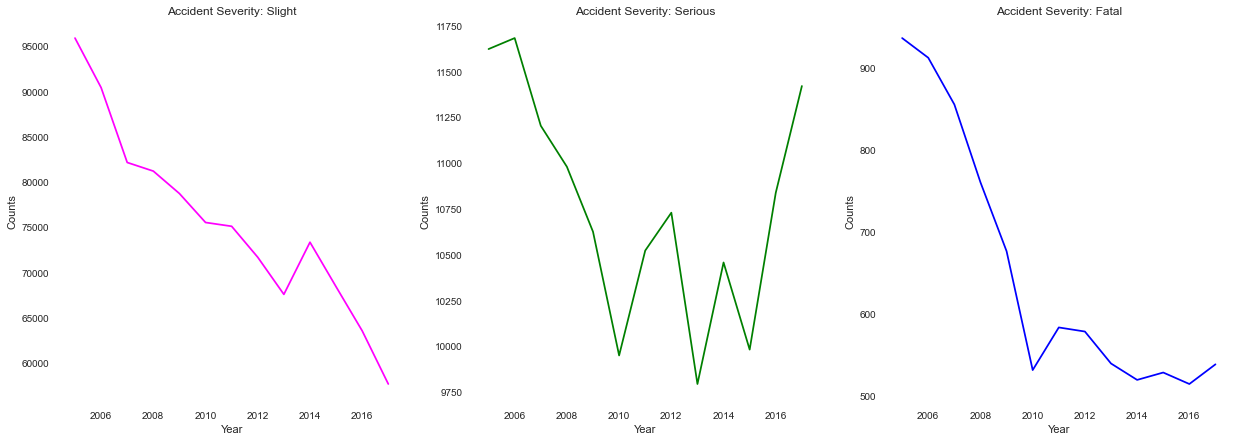

In [ ]:
plt.figure(figsize=(21,7))

plt.subplot(1,3,1)
sns.lineplot(x=severity_1.Year.value_counts().index,y=severity_1.Year.value_counts(),color="magenta")
plt.colormaps
plt.title("Accident Severity: Slight")
plt.xlabel("Year")
plt.ylabel("Counts")

plt.subplot(1,3,2)
sns.lineplot(x=severity_2.Year.value_counts().index,y=severity_2.Year.value_counts(),color="Green")
plt.title("Accident Severity: Serious")
plt.xlabel("Year")
plt.ylabel("Counts")

plt.subplot(1,3,3)
sns.lineplot(x=severity_3.Year.value_counts().index,y=severity_3.Year.value_counts(),color="blue")
plt.title("Accident Severity: Fatal")
plt.xlabel("Year")
plt.ylabel("Counts")

plt.show()

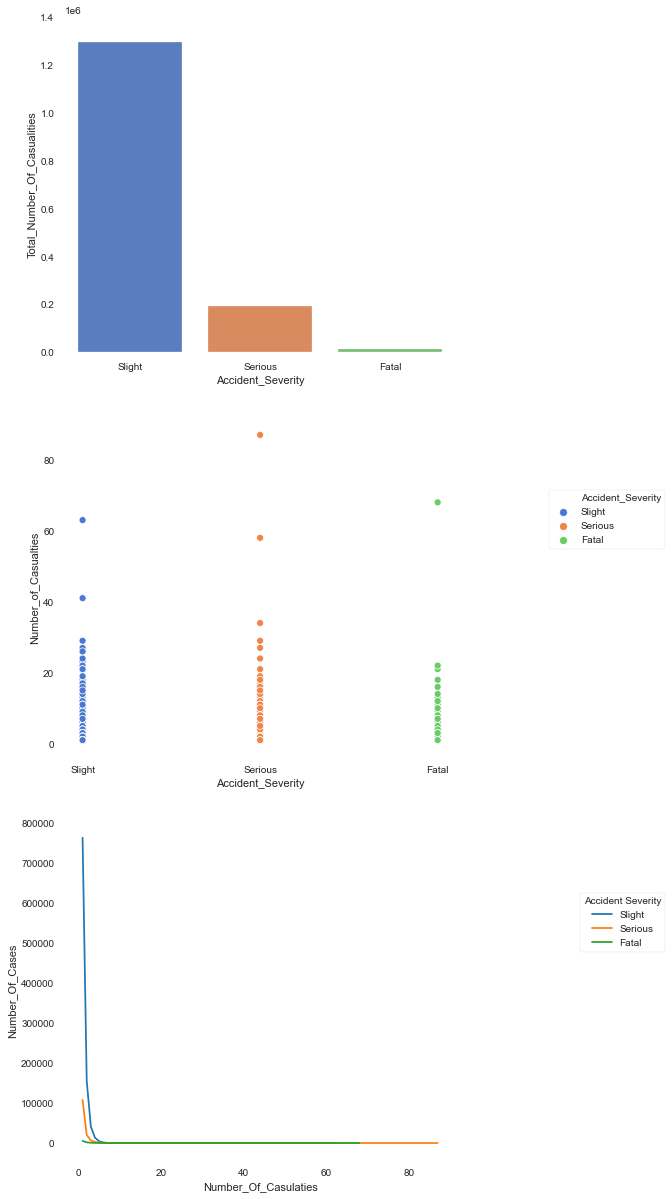

In [ ]:
plt.figure(figsize=(7,21))
plt.subplot(3,1,1)
sns.barplot(x=np.array(['Slight','Serious','Fatal']),y=np.array([severity_1.Number_of_Casualties.sum(),
                                              severity_2.Number_of_Casualties.sum(),
                                              severity_3.Number_of_Casualties.sum()]),palette="muted")
plt.xlabel('Accident_Severity')
plt.ylabel('Total_Number_Of_Casualities')
plt.ylim(0,1400000)

plt.subplot(3,1,2)
sns.scatterplot(x=df_cleaned.Accident_Severity,y=df_cleaned.Number_of_Casualties,hue=df_cleaned.Accident_Severity,palette="muted")
plt.legend(loc=4,bbox_to_anchor=(1.55,0.60))

plt.subplot(3,1,3)
sns.lineplot(x=severity_1.Number_of_Casualties.value_counts().index,y=severity_1.Number_of_Casualties.value_counts())
sns.lineplot(x=severity_2.Number_of_Casualties.value_counts().index,y=severity_2.Number_of_Casualties.value_counts())
sns.lineplot(x=severity_3.Number_of_Casualties.value_counts().index,y=severity_3.Number_of_Casualties.value_counts())
plt.xlabel('Number_Of_Casulaties')
plt.ylabel('Number_Of_Cases')
plt.legend(('Slight', 'Serious', 'Fatal'),title='Accident Severity',loc=4,bbox_to_anchor=(1.55,0.60))
plt.show()



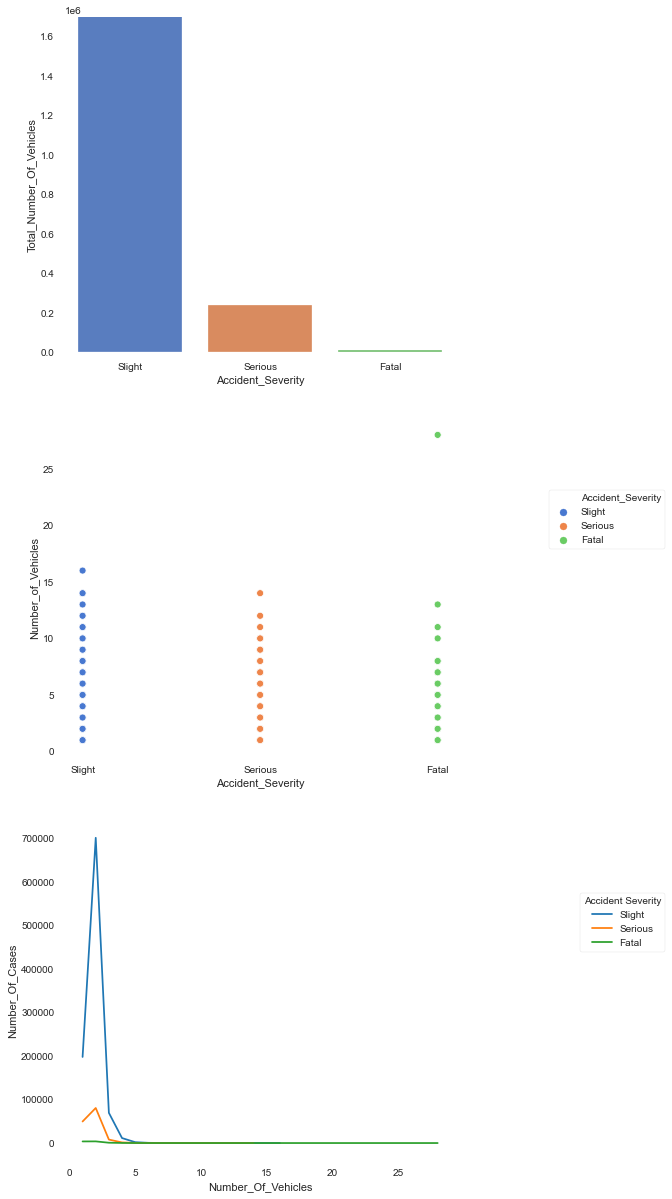

In [ ]:
plt.figure(figsize=(7,21))
plt.subplot(3,1,1)
sns.barplot(x=np.array(['Slight','Serious','Fatal']),y=np.array([severity_1.Number_of_Vehicles.sum(),
                                              severity_2.Number_of_Vehicles.sum(),
                                              severity_3.Number_of_Vehicles.sum()]),palette="muted")
plt.xlabel('Accident_Severity')
plt.ylabel('Total_Number_Of_Vehicles')
plt.ylim(0,1700000)

plt.subplot(3,1,2)
sns.scatterplot(x=df_cleaned.Accident_Severity,y=df_cleaned.Number_of_Vehicles,hue=df_cleaned.Accident_Severity,palette="muted")
plt.legend(loc=4,bbox_to_anchor=(1.55,0.60))

plt.subplot(3,1,3)
sns.lineplot(x=severity_1.Number_of_Vehicles.value_counts().index,y=severity_1.Number_of_Vehicles.value_counts(),)
sns.lineplot(x=severity_2.Number_of_Vehicles.value_counts().index,y=severity_2.Number_of_Vehicles.value_counts())
sns.lineplot(x=severity_3.Number_of_Vehicles.value_counts().index,y=severity_3.Number_of_Vehicles.value_counts())
plt.xlabel('Number_Of_Vehicles')
plt.ylabel('Number_Of_Cases')
plt.legend(('Slight', 'Serious', 'Fatal'),title='Accident Severity',loc=4,bbox_to_anchor=(1.55,0.60))
plt.show()


<h3>2.Pie Chart Analysis for Categorical Data</h3>
<h5>A. Road_Type</h5>

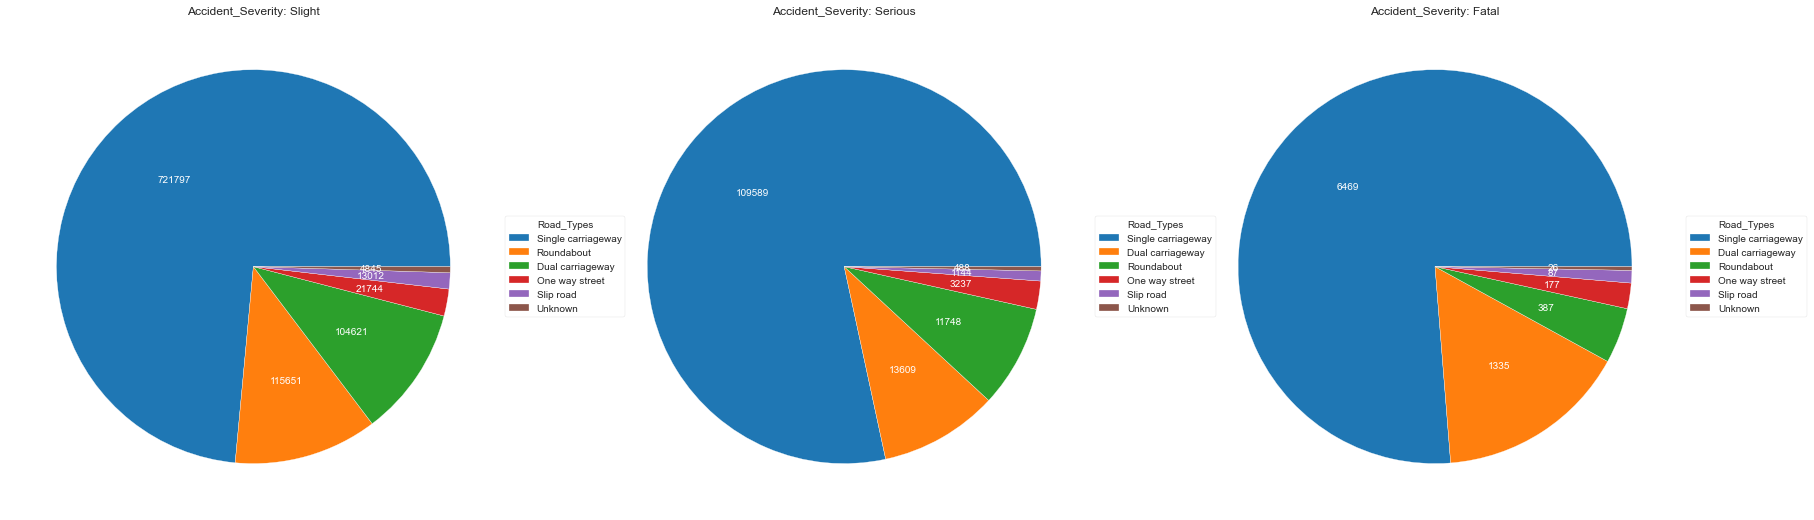

In [ ]:
def func(pct, allvals):
    absolute = int(pct*np.sum(allvals)/100)
    return "{}".format(absolute)

plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.pie(severity_1.Road_Type.value_counts(),autopct=lambda pct: func(pct, severity_1.Road_Type.value_counts()),textprops=dict(color="w"))
plt.legend(severity_1.Road_Type.value_counts().to_frame().index,
          title="Road_Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Slight')

plt.subplot(1,3,2)
plt.pie(severity_2.Road_Type.value_counts(),autopct=lambda pct: func(pct, severity_2.Road_Type.value_counts()),textprops=dict(color="w"))
plt.legend(severity_2.Road_Type.value_counts().to_frame().index,
          title="Road_Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Serious')


plt.subplot(1,3,3)
plt.pie(severity_3.Road_Type.value_counts(),autopct=lambda pct: func(pct, severity_3.Road_Type.value_counts()),textprops=dict(color="w"))
plt.legend(severity_3.Road_Type.value_counts().to_frame().index,
          title="Road_Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Fatal')






plt.show()


<h5>B. Weather_Conditions</h5>

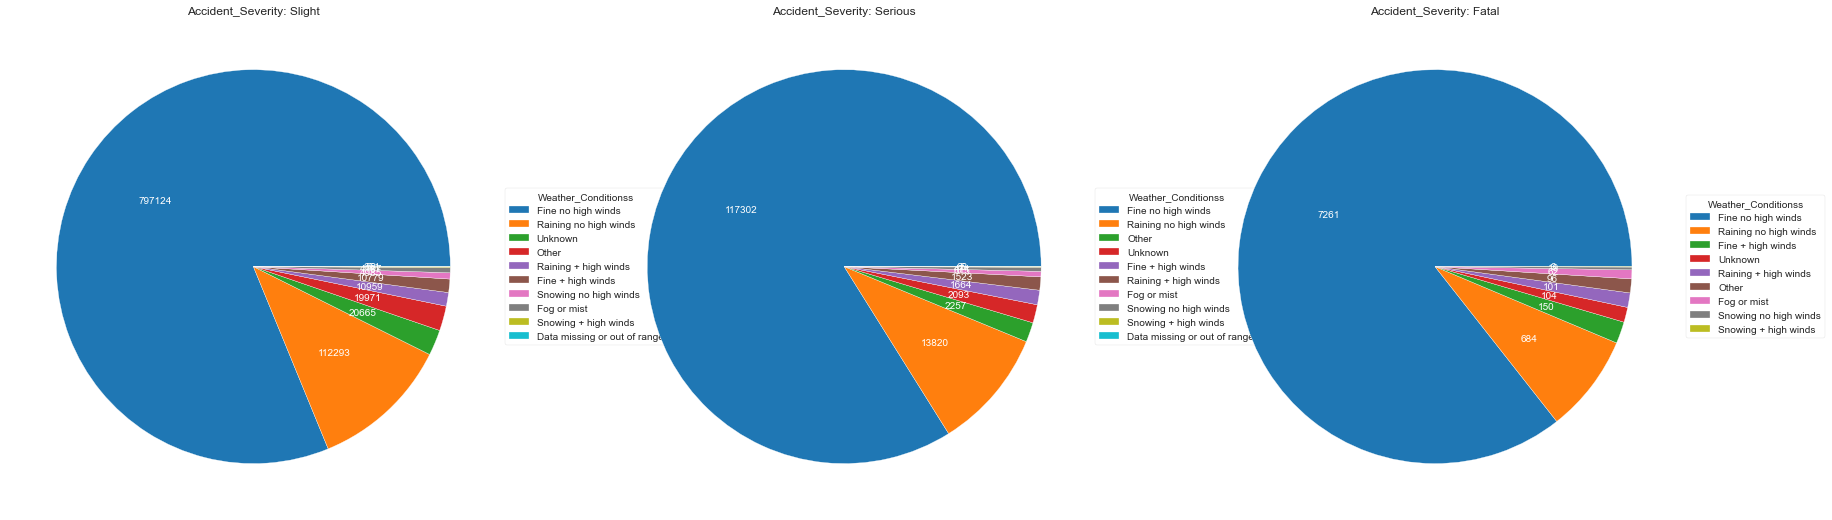

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.pie(severity_1.Weather_Conditions.value_counts(),autopct=lambda pct: func(pct, severity_1.Weather_Conditions.value_counts()),textprops=dict(color="w"))
plt.legend(severity_1.Weather_Conditions.value_counts().to_frame().index,
          title="Weather_Conditionss",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Slight')

plt.subplot(1,3,2)
plt.pie(severity_2.Weather_Conditions.value_counts(),autopct=lambda pct: func(pct, severity_2.Weather_Conditions.value_counts()),textprops=dict(color="w"))
plt.legend(severity_2.Weather_Conditions.value_counts().to_frame().index,
          title="Weather_Conditionss",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Serious')


plt.subplot(1,3,3)
plt.pie(severity_3.Weather_Conditions.value_counts(),autopct=lambda pct: func(pct, severity_3.Weather_Conditions.value_counts()),textprops=dict(color="w"))
plt.legend(severity_3.Weather_Conditions.value_counts().to_frame().index,
          title="Weather_Conditionss",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Fatal')
plt.show()


<h5>C. Light_Conditions</h5>

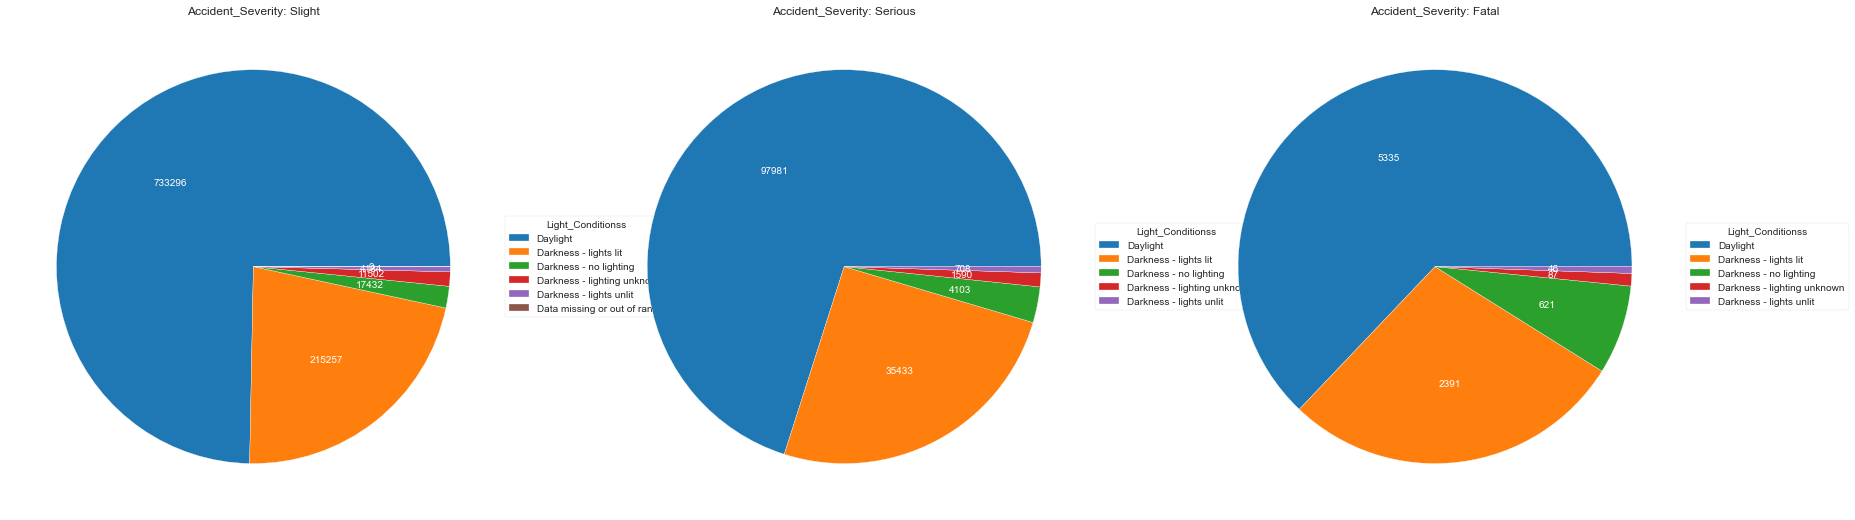

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.pie(severity_1.Light_Conditions.value_counts(),autopct=lambda pct: func(pct, severity_1.Light_Conditions.value_counts()),textprops=dict(color="w"))
plt.legend(severity_1.Light_Conditions.value_counts().to_frame().index,
          title="Light_Conditionss",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Slight')

plt.subplot(1,3,2)
plt.pie(severity_2.Light_Conditions.value_counts(),autopct=lambda pct: func(pct, severity_2.Light_Conditions.value_counts()),textprops=dict(color="w"))
plt.legend(severity_2.Light_Conditions.value_counts().to_frame().index,
          title="Light_Conditionss",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Serious')


plt.subplot(1,3,3)
plt.pie(severity_3.Light_Conditions.value_counts(),autopct=lambda pct: func(pct, severity_3.Light_Conditions.value_counts()),textprops=dict(color="w"))
plt.legend(severity_3.Light_Conditions.value_counts().to_frame().index,
          title="Light_Conditionss",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Fatal')
plt.show()


<h5>D. Day_of_Week</h5>

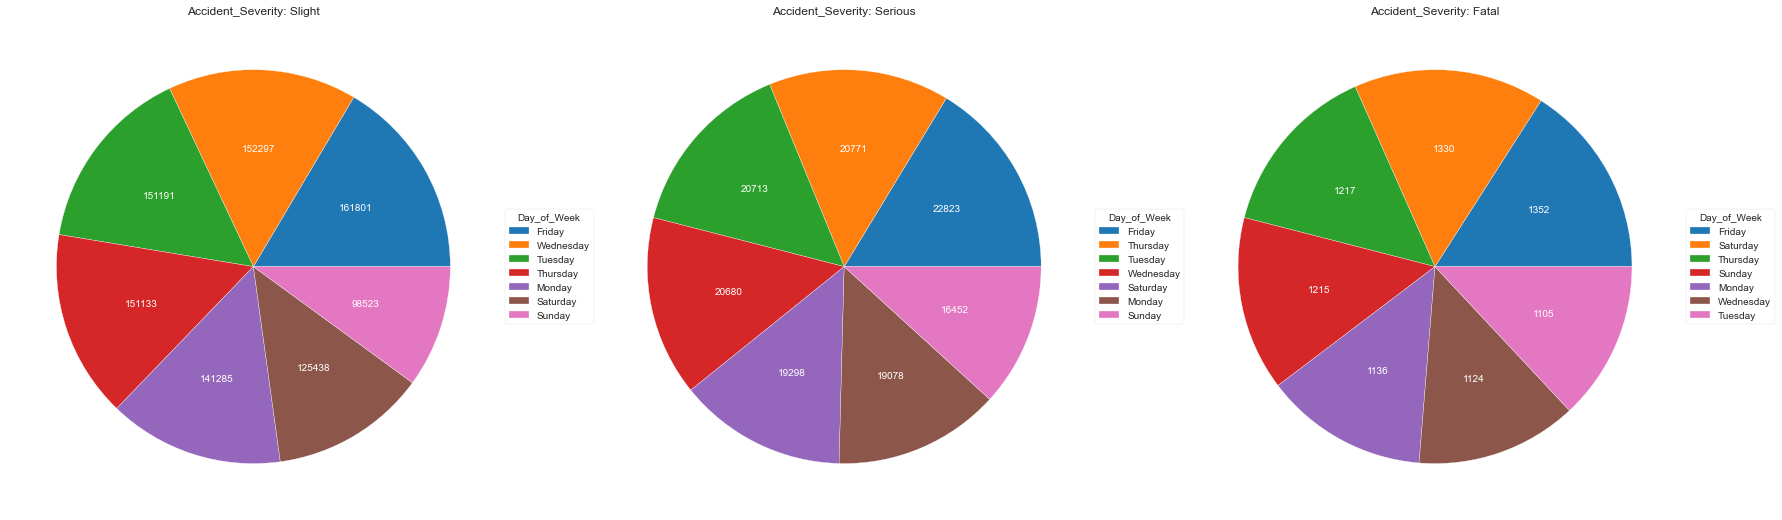

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.pie(severity_1.Day_of_Week.value_counts(),autopct=lambda pct: func(pct, severity_1.Day_of_Week.value_counts()),textprops=dict(color="w"))
plt.legend(severity_1.Day_of_Week.value_counts().to_frame().index,
          title="Day_of_Week",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Slight')

plt.subplot(1,3,2)
plt.pie(severity_2.Day_of_Week.value_counts(),autopct=lambda pct: func(pct, severity_2.Day_of_Week.value_counts()),textprops=dict(color="w"))
plt.legend(severity_2.Day_of_Week.value_counts().to_frame().index,
          title="Day_of_Week",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Serious')


plt.subplot(1,3,3)
plt.pie(severity_3.Day_of_Week.value_counts(),autopct=lambda pct: func(pct, severity_3.Day_of_Week.value_counts()),textprops=dict(color="w"))
plt.legend(severity_3.Day_of_Week.value_counts().to_frame().index,
          title="Day_of_Week",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Fatal')
plt.show()



<h5>E. Road_Surface_Conditions</h5>

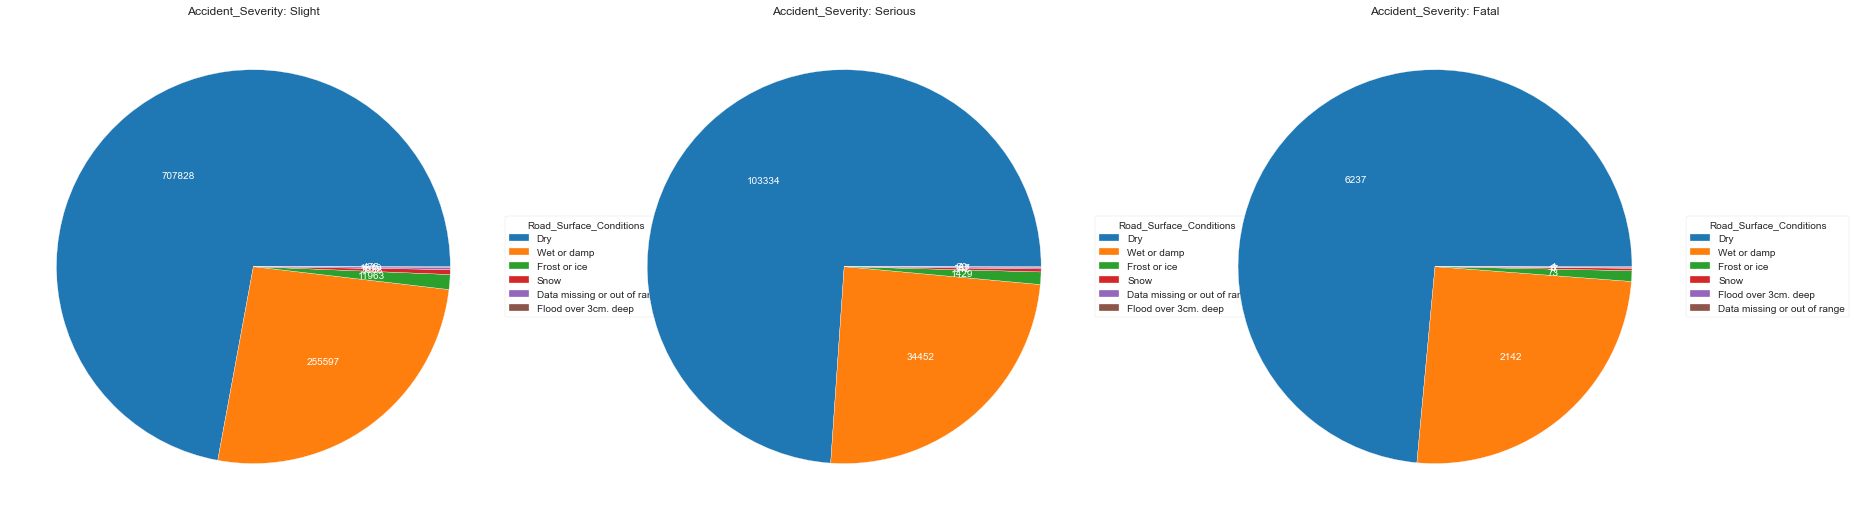

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.pie(severity_1.Road_Surface_Conditions.value_counts(),autopct=lambda pct: func(pct, severity_1.Road_Surface_Conditions.value_counts()),textprops=dict(color="w"))
plt.legend(severity_1.Road_Surface_Conditions.value_counts().to_frame().index,
          title="Road_Surface_Conditions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Slight')

plt.subplot(1,3,2)
plt.pie(severity_2.Road_Surface_Conditions.value_counts(),autopct=lambda pct: func(pct, severity_2.Road_Surface_Conditions.value_counts()),textprops=dict(color="w"))
plt.legend(severity_2.Road_Surface_Conditions.value_counts().to_frame().index,
          title="Road_Surface_Conditions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Serious')


plt.subplot(1,3,3)
plt.pie(severity_3.Road_Surface_Conditions.value_counts(),autopct=lambda pct: func(pct, severity_3.Road_Surface_Conditions.value_counts()),textprops=dict(color="w"))
plt.legend(severity_3.Road_Surface_Conditions.value_counts().to_frame().index,
          title="Road_Surface_Conditions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Fatal')
plt.show()



<h5>F. Urban_or_Rural_Area</h5>

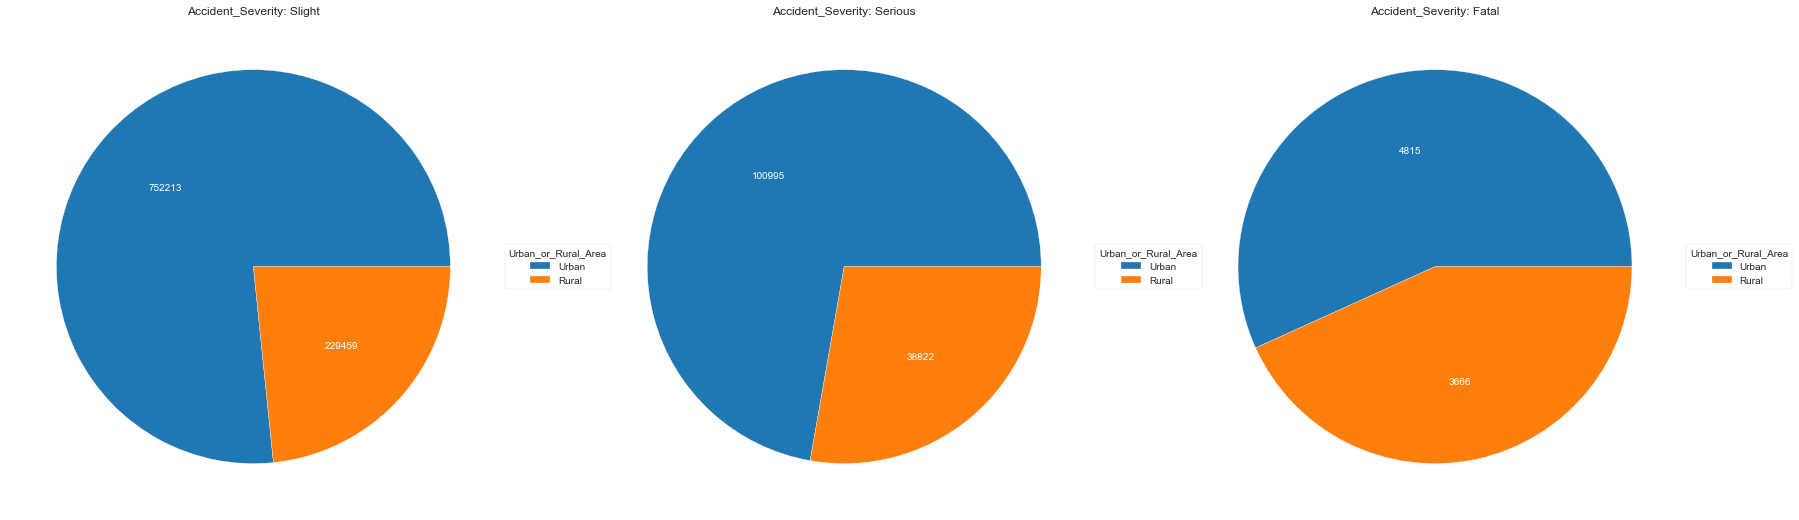

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.pie(severity_1.Urban_or_Rural_Area.value_counts(),autopct=lambda pct: func(pct, severity_1.Urban_or_Rural_Area.value_counts()),textprops=dict(color="w"))
plt.legend(severity_1.Urban_or_Rural_Area.value_counts().to_frame().index,
          title="Urban_or_Rural_Area",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Slight')

plt.subplot(1,3,2)
plt.pie(severity_2.Urban_or_Rural_Area.value_counts(),autopct=lambda pct: func(pct, severity_2.Urban_or_Rural_Area.value_counts()),textprops=dict(color="w"))
plt.legend(severity_2.Urban_or_Rural_Area.value_counts().to_frame().index,
          title="Urban_or_Rural_Area",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Serious')


plt.subplot(1,3,3)
plt.pie(severity_3.Urban_or_Rural_Area.value_counts(),autopct=lambda pct: func(pct, severity_3.Urban_or_Rural_Area.value_counts()),textprops=dict(color="w"))
plt.legend(severity_3.Urban_or_Rural_Area.value_counts().to_frame().index,
          title="Urban_or_Rural_Area",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Accident_Severity: Fatal')
plt.show()

<h3>3. Heat Map and Correlation Matrix</h3>


In [ ]:
corr=df_cleaned.corr()
corr

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year
1st_Road_Number,1.000000,0.243660,-0.003908,0.096331,-0.135789,0.019531,0.014865,0.004509,0.037818,-0.030949,-0.016016
2nd_Road_Number,0.243660,1.000000,0.015360,0.072847,-0.045916,0.010939,0.007365,-0.000142,0.061512,0.035390,-0.023054
Did_Police_Officer_Attend_Scene_of_Accident,-0.003908,0.015360,1.000000,0.015702,0.006086,-0.099259,-0.025947,0.000923,-0.013940,-0.090975,0.000852
Latitude,0.096331,0.072847,0.015702,1.000000,-0.302511,0.073615,0.011270,0.004590,-0.020433,0.023397,-0.056016
Longitude,-0.135789,-0.045916,0.006086,-0.302511,1.000000,-0.063892,-0.028145,-0.003950,0.068919,-0.051064,0.058668
Number_of_Casualties,0.019531,0.010939,-0.099259,0.073615,-0.063892,1.000000,0.207090,-0.001983,-0.015491,0.117068,-0.020940
Number_of_Vehicles,0.014865,0.007365,-0.025947,0.011270,-0.028145,0.207090,1.000000,-0.020042,-0.076942,0.110086,-0.010938
Pedestrian_Crossing-Human_Control,0.004509,-0.000142,0.000923,0.004590,-0.003950,-0.001983,-0.020042,1.000000,0.073681,-0.028046,0.019384
Pedestrian_Crossing-Physical_Facilities,0.037818,0.061512,-0.013940,-0.020433,0.068919,-0.015491,-0.076942,0.073681,1.000000,-0.153035,0.047993
Speed_limit,-0.030949,0.035390,-0.090975,0.023397,-0.051064,0.117068,0.110086,-0.028046,-0.153035,1.000000,-0.049014


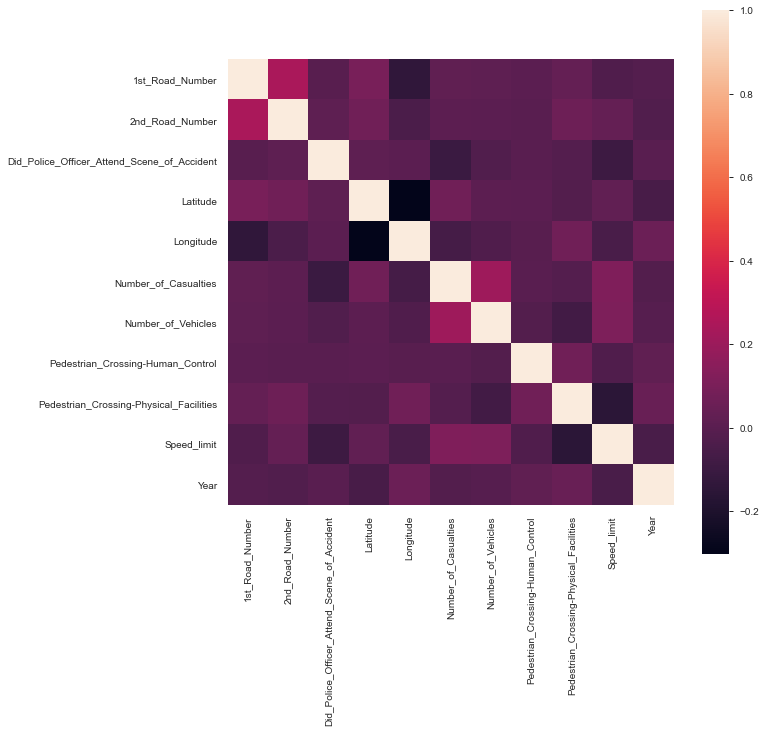

In [ ]:
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,square=True)

<h3>4. Scatter Plot</h3>
<h5>A. Grid scatter plot using Seaborn</h5>

In [ ]:
numerical_data=df_cleaned.select_dtypes(include=['number'])

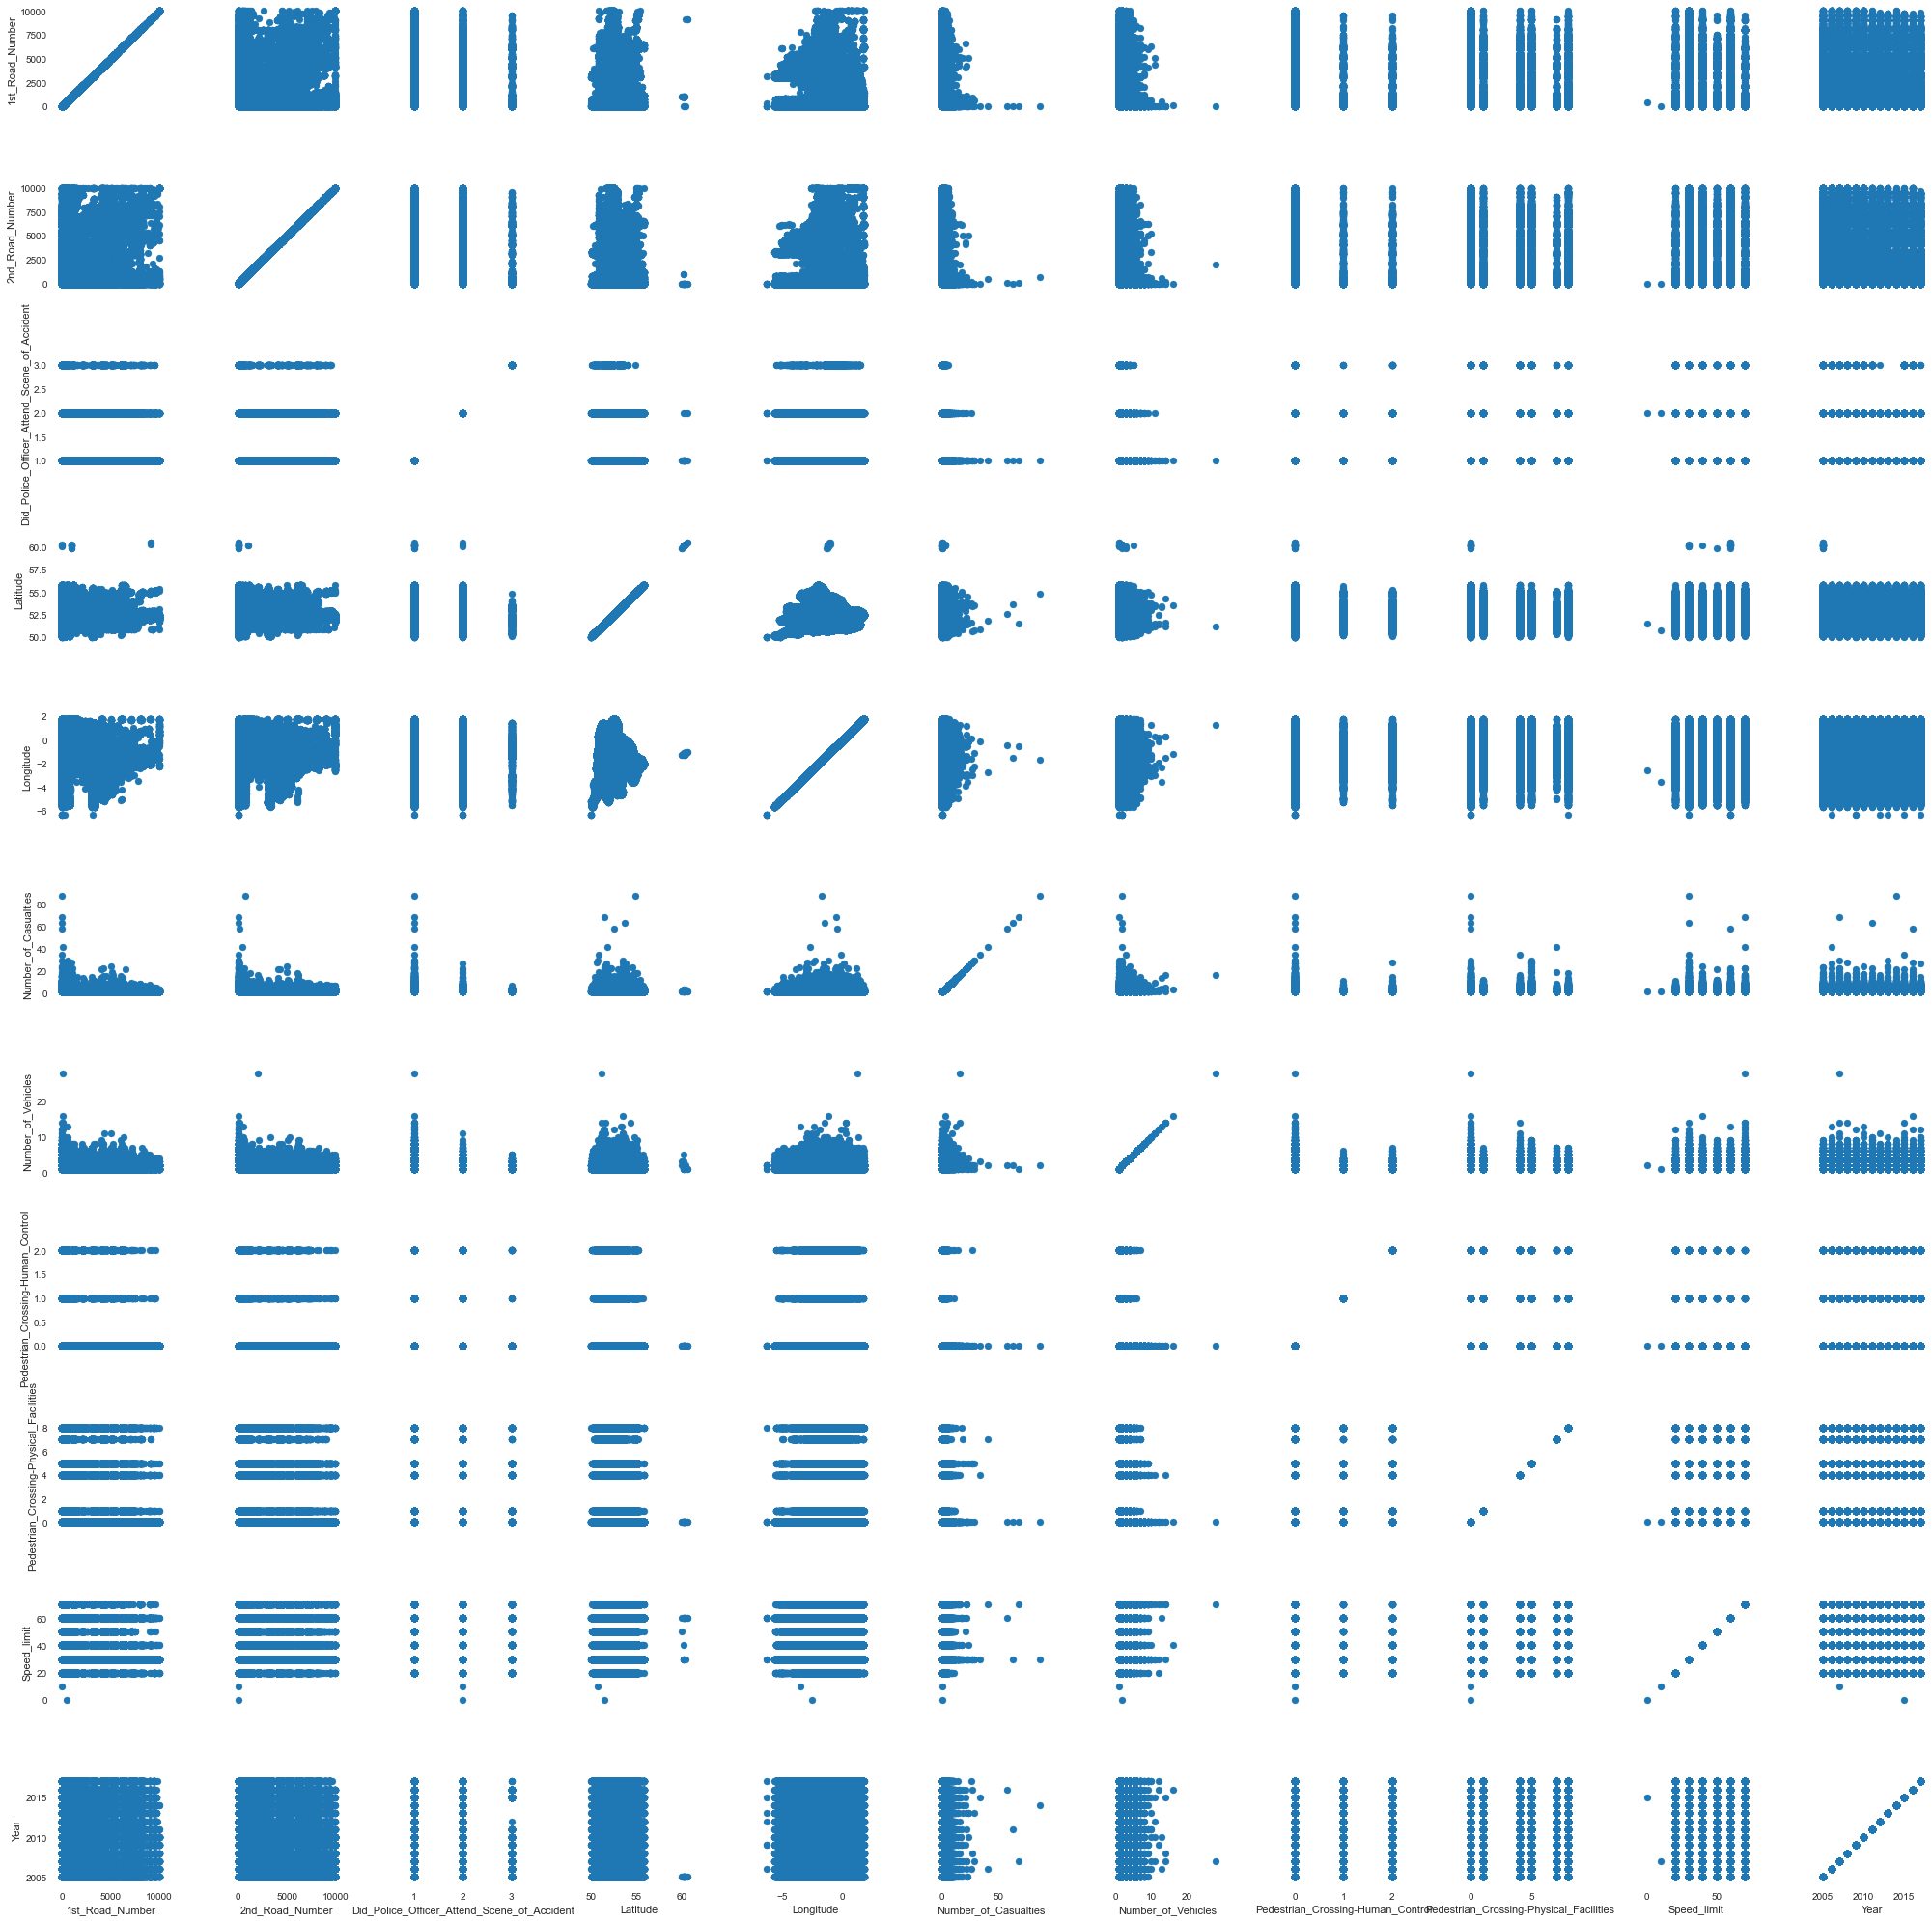

In [ ]:
g=sns.PairGrid(numerical_data)
g.map(plt.scatter)

<h5>B. 3 Variable scatterplot using Seaborn</h5>

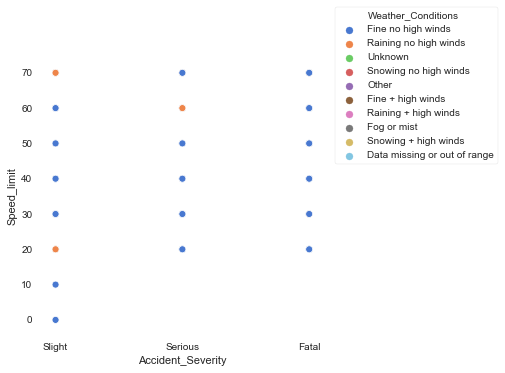

In [ ]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
sns.scatterplot(x='Accident_Severity', y='Speed_limit', hue='Weather_Conditions',palette="muted",data=df_cleaned)
plt.legend(loc=4,bbox_to_anchor=(1.65,0.60))
plt.show()

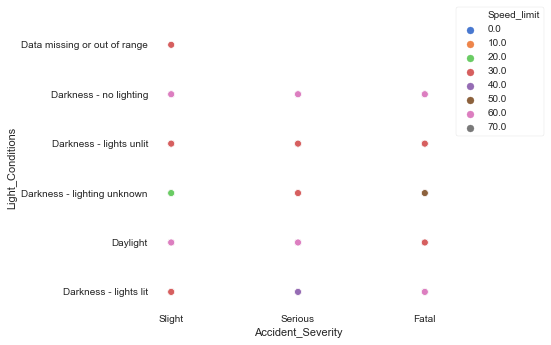

In [ ]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
sns.scatterplot(x='Accident_Severity', y='Light_Conditions', hue='Speed_limit',palette="muted",data=df_cleaned)
plt.legend(loc=4,bbox_to_anchor=(1.40,0.60))
plt.show()

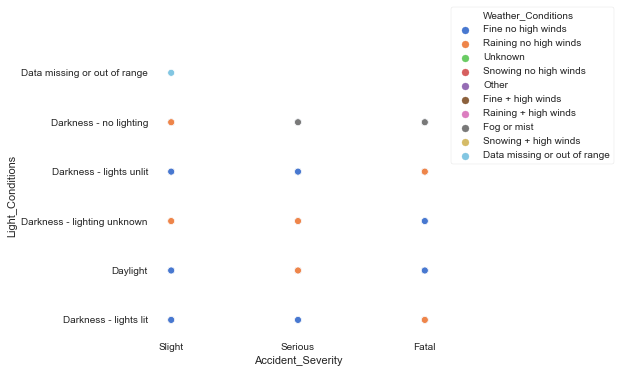

In [ ]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
sns.scatterplot(x='Accident_Severity', y='Light_Conditions', hue='Weather_Conditions',palette="muted",data=df_cleaned)
plt.legend(loc=4,bbox_to_anchor=(1.65,0.60))
plt.show()

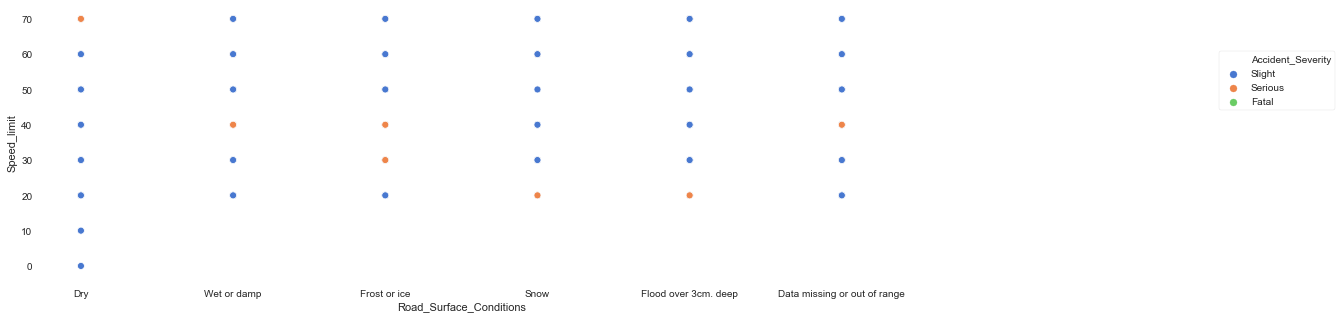

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
sns.scatterplot(x='Road_Surface_Conditions', y='Speed_limit', hue='Accident_Severity',palette="muted",data=df_cleaned)
plt.legend(loc=4,bbox_to_anchor=(1.55,0.60))
plt.show()

<h3>5. Using Pandas Profiling Library </h3>


In [ ]:
# Generate the Profiling Report on Uncleaned Data
profile = pp.ProfileReport(df, title="UK Accident Data-2018", explorative=True,html={'style': {'full_width': True}}, sort="None")
# The Notebook Widgets Interface
profile.to_file('Data/RealUKAccidentAnalysisData/dftRoadSafetyData_Accidents_2018.html')

In [ ]:
# Generate the Profiling Report on Cleaned Data
profile = pp.ProfileReport(df_cleaned, title="UK Accident Data-2018", explorative=True,html={'style': {'full_width': True}}, sort="None")
# The Notebook Widgets Interface
profile.to_file('Data/RealUKAccidentAnalysisData/dftRoadSafetyData_Accidents_2018_cleaned.html')